<a href="https://colab.research.google.com/github/apurv1260/Exploratory-analysis-of-the-video-game-industry/blob/main/Video_Game_Industry_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Analysis of video game industry from 1980 to 2020***

Importing importance libary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

***Exploration of the dataframe***


Before analyzing anything, we are first going to explore the dataframe and understand if there are any mistakes (such as missing values).

In [2]:
sales = pd.read_csv("/content/Video Game Sales.csv")

In [3]:
sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
sales.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [6]:
sales.shape

(16598, 11)

In [8]:
sales=sales.set_index('Rank')

In [9]:
sales.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


We have missing values in the Year and Publisher columns. However, since we are not going to perform any Machine Learning techniques here (for example Linear Regression) and since the DataFrame is extremely large, those missing values do not represent such an important amount to do anything about it.

***How many platforms and games are there?***


In [10]:
sales['Platform'].value_counts()

,count
Platform,
DS,2163
PS2,2161
PS3,1329
Wii,1325
X360,1265
PSP,1213
PS,1196
PC,960
XB,824


The DS game boy is the consoles with the more games. It is then directly followed by Playstation with the PS2 and the PS3. Playsation seems to be offering more games to their users for their home consoles. But if we take a closer look, Nintendo is also more diversified and offer a wider range of possibilities.

In [11]:
sales['Name'].nunique()

11493

In [12]:
sales['Year'].max()

2020.0

In [13]:
sales['Year'].min()


1980.0

              Global_Sales
Genre                     
Action             1751.18
Adventure           239.04
Fighting            448.91
Misc                809.96
Platform            831.37
Puzzle              244.95
Racing              732.04
Role-Playing        927.37
Shooter            1037.37
Simulation          392.20
Sports             1330.93
Strategy            175.12


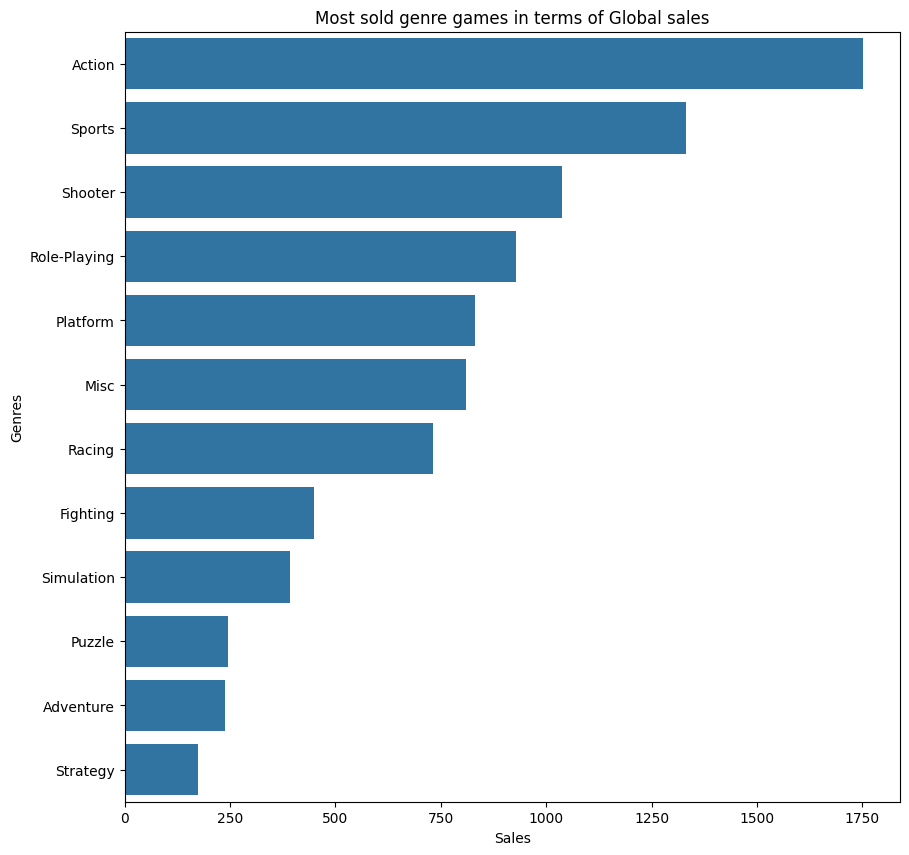

In [15]:
#Most popular genre in the dataset by Sum of Worldwide Sales

Grouped_Genre = sales.pivot_table(values='Global_Sales',index='Genre', aggfunc='sum')
print(Grouped_Genre)
Grouped_Genre = Grouped_Genre.sort_values(by = 'Global_Sales',ascending  = False)

# Plot the data
plt.rcParams['figure.figsize'] = (10,10)
sns.barplot(x=Grouped_Genre['Global_Sales'],y=Grouped_Genre.index, orient='h')
plt.title("Most sold genre games in terms of Global sales")
plt.ylabel("Genres")
plt.xlabel("Sales")
plt.show()

The Action genre dominates the Global Market by 20%. Sport games are then the second most popular genre (15% of the market). It is an interesting insight as we will see later that sport games might actually dominate the whole market.

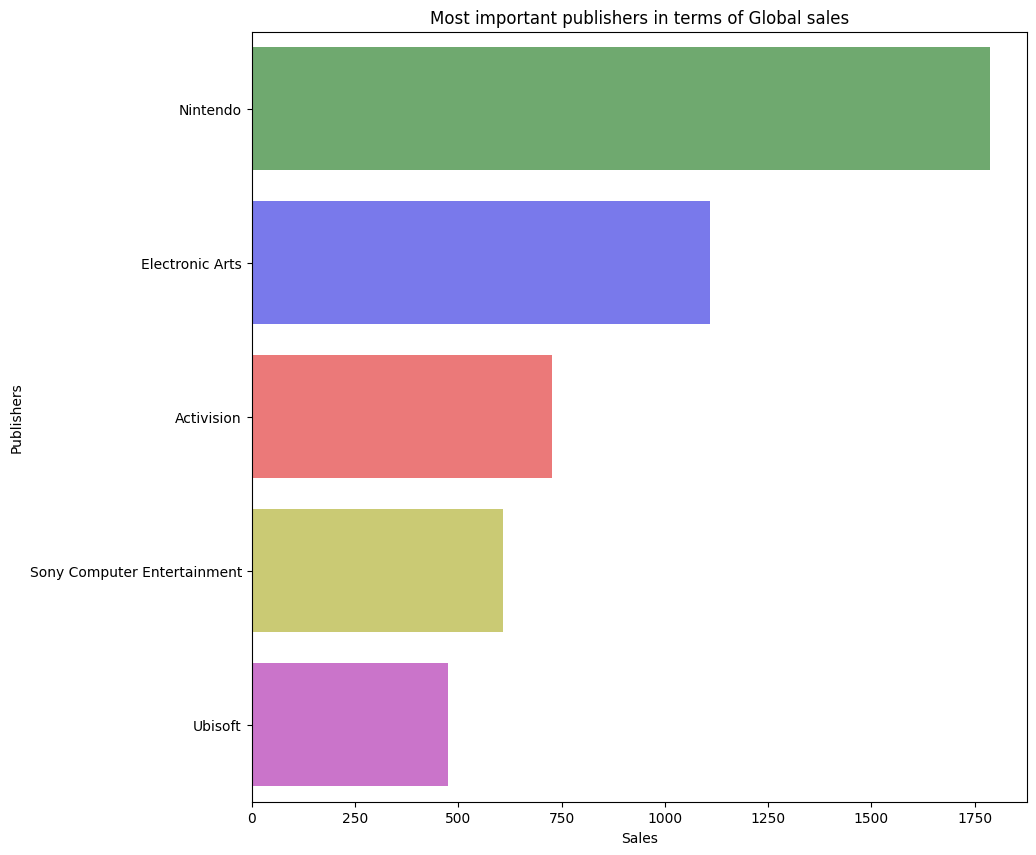

In [39]:
#5 best Publisher

plt.rcParams['figure.figsize'] = (10,10)
Publisher_Sales  = sales.pivot_table(index = 'Publisher' ,values = 'Global_Sales',aggfunc = sum)
Publisher_Sales  = Publisher_Sales.sort_values(by = 'Global_Sales',ascending  = False).head(5)
sns.barplot(x=Publisher_Sales['Global_Sales'],y=Publisher_Sales.index, orient='h',palette=('g','b','r','y','m'),alpha=0.6)
plt.title("Most important publishers in terms of Global sales")
plt.ylabel("Publishers")
plt.xlabel("Sales")
plt.show()

While we saw previously that Playstation was offering more games to their home console users. It does appear that Nintendo is by far the most popular publisher when it comes to global sales. Electronic Arts is 2nd while Sony is 4th. Ubisoft also appear to the last one despite the fact that most of their games can be considered as legendary in terms of reputation.

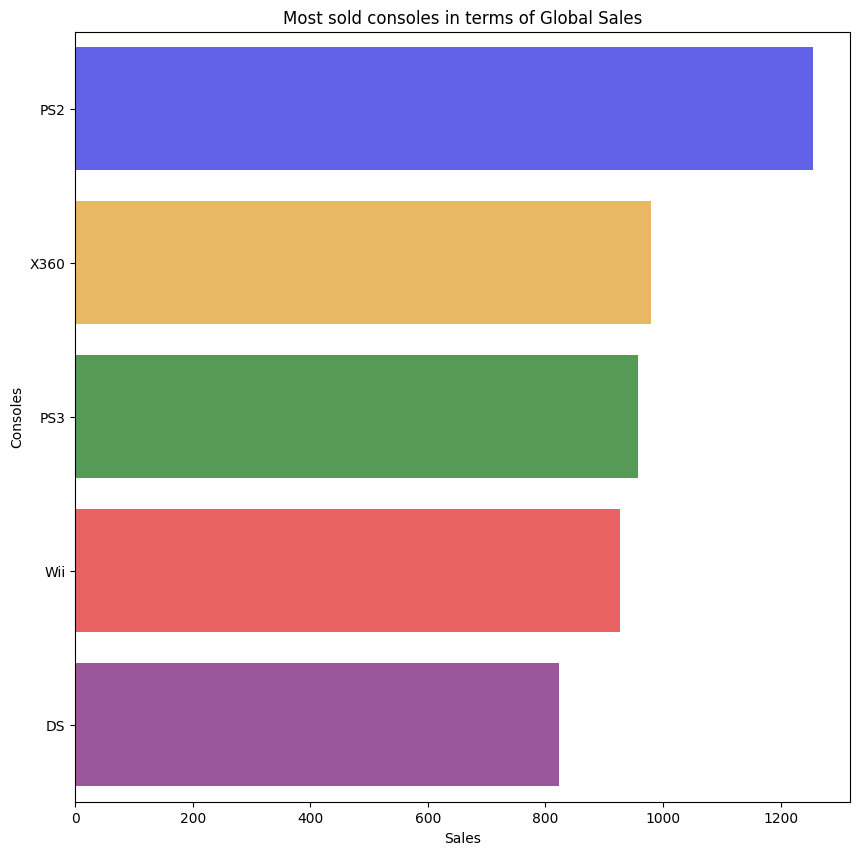

In [40]:
#5 Best Platform

plt.rcParams['figure.figsize'] = (10,10)
Platform_Sales  = sales.pivot_table(index = 'Platform' ,values = 'Global_Sales',aggfunc = sum)
Platform_Sales  = Platform_Sales.sort_values(by = 'Global_Sales',ascending  = False).head(5)
sns.barplot(x=Platform_Sales['Global_Sales'],y=Platform_Sales.index, orient='h',palette=('b','orange','g','r','purple'),alpha=0.7)
plt.title("Most sold consoles in terms of Global Sales")
plt.ylabel("Consoles")
plt.xlabel("Sales")
plt.show()

If Nintendo produces and sells more games (The DS game boy might have helped from what we saw earlier). The PS2 is the most sold home console by far. The PS3 is in the 3rd position while the Nintendo Wii and DS gameboy are occupying the 4th and 5th positions respectively. This is interesting as Nintendo does sale more games as a publishers but Playsation appears to be the favorite when it comes to consoles. **Nintendo is however the leader in the field of portable consoles.**

                                Global_Sales
Name                                        
Wii Sports                             82.74
Grand Theft Auto V                     55.92
Super Mario Bros.                      45.31
Tetris                                 35.84
Mario Kart Wii                         35.82
Wii Sports Resort                      33.00
Pokemon Red/Pokemon Blue               31.37
Call of Duty: Black Ops                31.03
Call of Duty: Modern Warfare 3         30.83
New Super Mario Bros.                  30.01


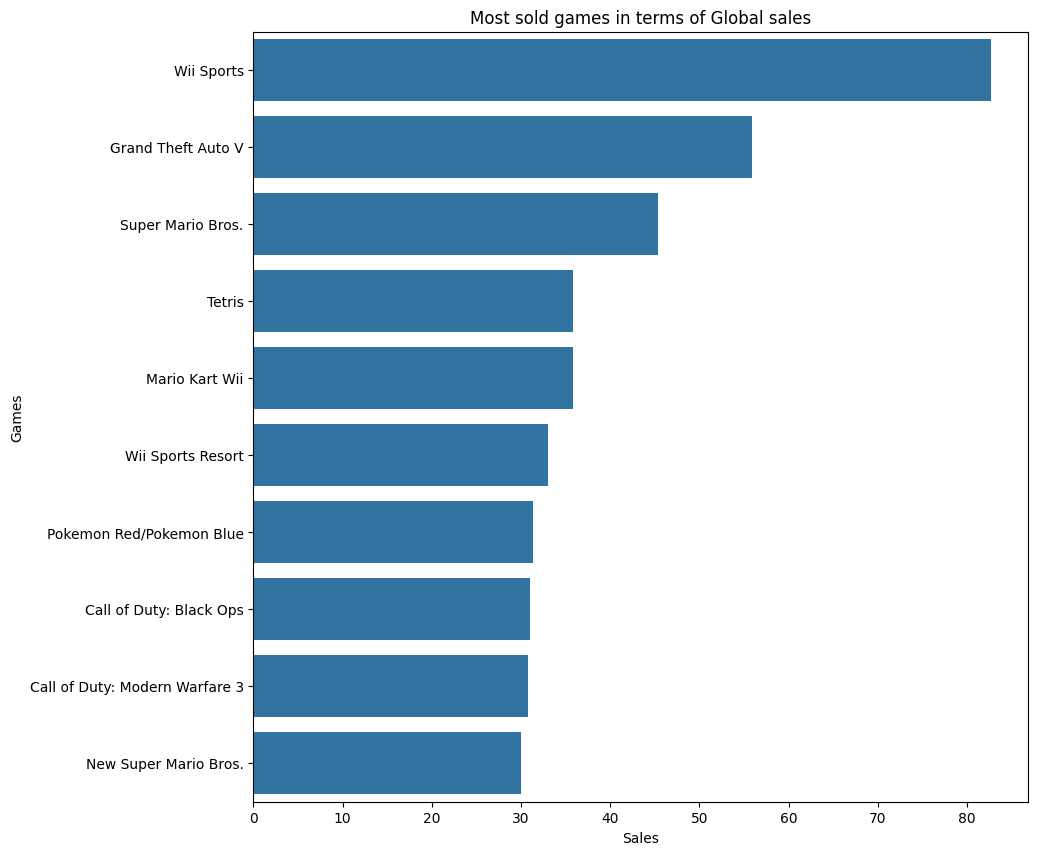

In [42]:
#Best games

plt.rcParams['figure.figsize'] = (10,10)
Games_Sales  = sales.pivot_table(index = 'Name' ,values = 'Global_Sales',aggfunc = sum)
Games_Sales  = Games_Sales.sort_values(by = 'Global_Sales', ascending  = False).head(10)
print(Games_Sales)
sns.barplot(x=Games_Sales['Global_Sales'],y=Games_Sales.index, orient='h')
plt.title("Most sold games in terms of Global sales")
plt.ylabel("Games")
plt.xlabel("Sales")
plt.show()

Remember when we said that sport genre games might be more popular than the action genre? Well it turns out that **Wii Sport** was the most sold game on the globe. Nintendo does seem to master the market as 5 of the games in this top 10 were published by Nintendo.

***Evolution and Distribution of sales (Worldwide)***


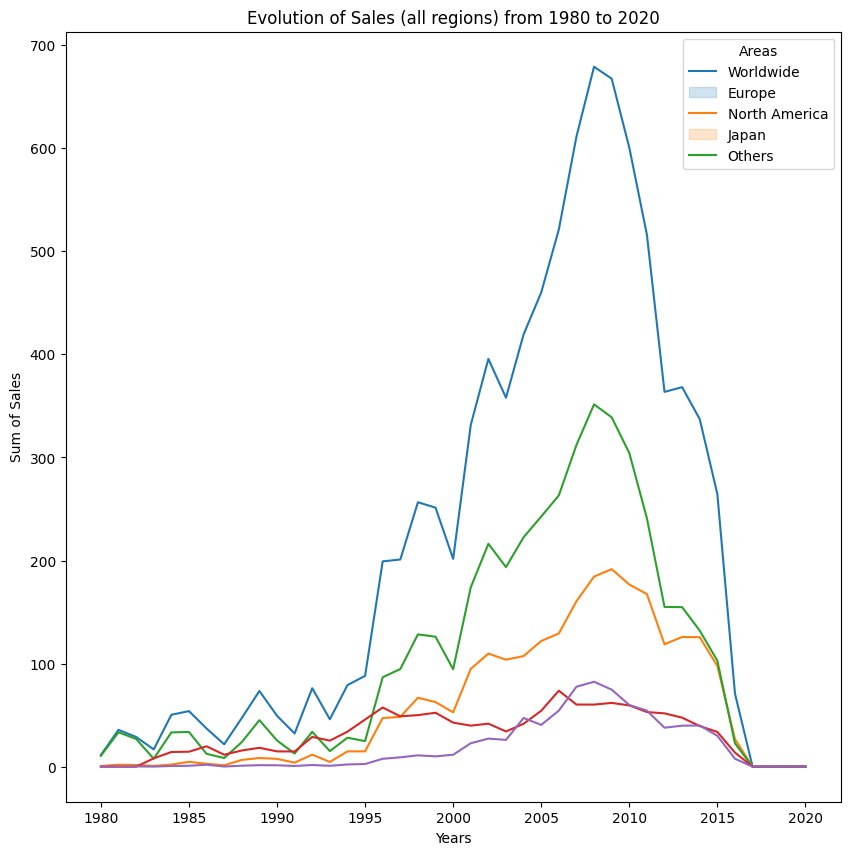

In [41]:
#Global Sales Evolution

Global_Sales_Evolution  = sales.pivot_table(index = 'Year' ,values = 'Global_Sales',aggfunc = sum)
sns.lineplot(x=Global_Sales_Evolution.index, y=Global_Sales_Evolution['Global_Sales'])

#EU Sales Evolution

EU_Sales_Evolution  = sales.pivot_table(index = 'Year' ,values = 'EU_Sales',aggfunc = sum)
sns.lineplot(x=EU_Sales_Evolution.index, y=EU_Sales_Evolution['EU_Sales'])

#NA Sales Evolution

NA_Sales_Evolution  = sales.pivot_table(index = 'Year' ,values = 'NA_Sales',aggfunc = sum)
sns.lineplot(x=NA_Sales_Evolution.index,y= NA_Sales_Evolution['NA_Sales'])

#JP Sales Evolution

JP_Sales_Evolution  = sales.pivot_table(index = 'Year' ,values = 'JP_Sales',aggfunc = sum)
sns.lineplot(x=JP_Sales_Evolution.index, y=JP_Sales_Evolution['JP_Sales'])

#Other Sales Evolution

O_Sales_Evolution  = sales.pivot_table(index = 'Year' ,values = 'Other_Sales',aggfunc = sum)
sns.lineplot(x=O_Sales_Evolution.index, y=O_Sales_Evolution['Other_Sales'])

plt.rcParams['figure.figsize'] = (10,10)
plt.legend(title='Areas', loc='upper right', labels=['Worldwide', 'Europe', 'North America', 'Japan', 'Others'])
plt.title("Evolution of Sales (all regions) from 1980 to 2020")
plt.ylabel("Sum of Sales")
plt.xlabel("Years")
plt.show()

In terms of the evolution and distribution of the sales, North America appears to be the first and most important market. Europe is in second position followed by other areas. The Japan curve is not behaving exactly as the others. If the Global, European and North American sales follow one same path, Japan has a different evolution and appear to look smaller in volumes but more stable over time. Regarding the rest of the world, we can see on the chart that there was an important peek starting in the year 1995. It did reach its highest point from the years 2000 to 2010 before it started to decrease. The lines after 2015 are rapidly flattening because we are missing data.

***How is the market shared among the publishers?***


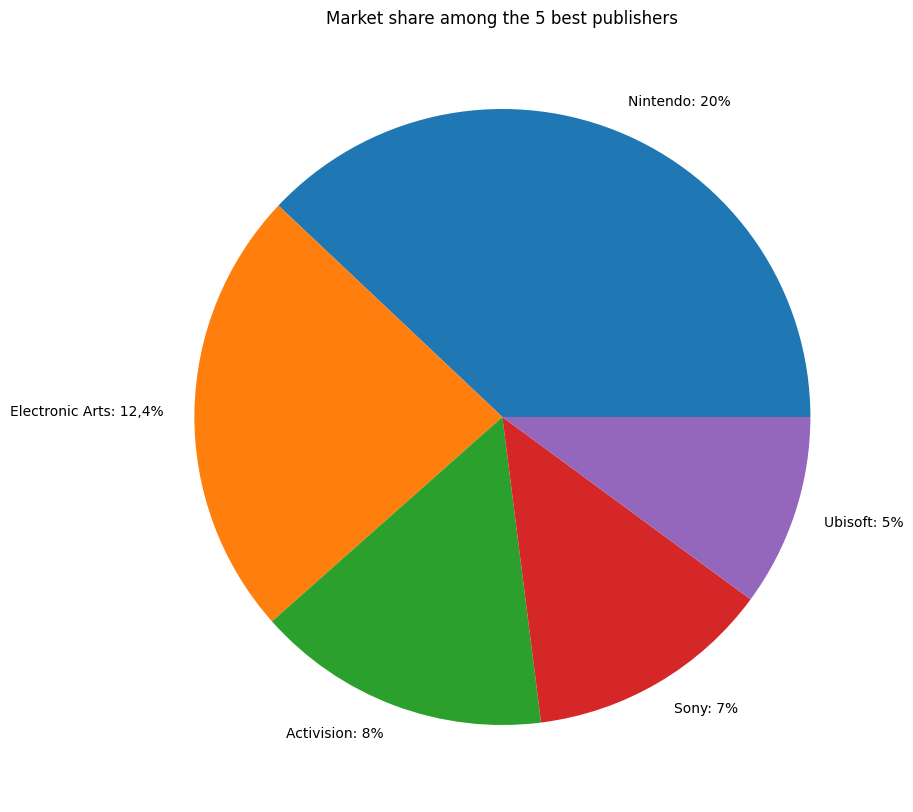

In [34]:
All_Sales = sales["Global_Sales"].sum()
Sales_Nintendo = sales[sales["Publisher"] == "Nintendo"]["Global_Sales"].sum()
Sales_Nintendo = (Sales_Nintendo / All_Sales) * 100
Sales_Electronic_Arts = sales[sales["Publisher"] == "Electronic Arts"]["Global_Sales"].sum() * 100 / All_Sales
Sales_Activision = sales[sales["Publisher"] == "Activision"]["Global_Sales"].sum() * 100 / All_Sales
Sales_Sony = sales[sales["Publisher"] == "Sony Computer Entertainment"]["Global_Sales"].sum() * 100 / All_Sales
Sales_Ubisoft = sales[sales["Publisher"] == "Ubisoft"]["Global_Sales"].sum() * 100 / All_Sales
Market_Plot = [Sales_Nintendo, Sales_Electronic_Arts, Sales_Activision, Sales_Sony, Sales_Ubisoft]
plt.pie(Market_Plot, labels=['Nintendo: 20%', 'Electronic Arts: 12,4%', 'Activision: 8%', 'Sony: 7%', 'Ubisoft: 5%'])
plt.title("Market share among the 5 best publishers")
plt.show()

No surprise here. Nintendo is the leader among the publishers with 20% of the market share. The diversity of their consoles and the number of games they publish are among the highest. Also, Wii sport is the most popular game in the world and it must have given them a head start.

***Wait, what could be the most popular games among those 5 all mighty publishers?***

In [35]:
#Nintendo

Top_Nintendo_Game = sales[sales.Publisher == "Nintendo"][["Name","Global_Sales"]].drop_duplicates(["Name"]).head(1)
Top_Nintendo_Game = Top_Nintendo_Game.set_index('Name')
Top_Nintendo_Game.columns.name = 'Nintendo'

print(Top_Nintendo_Game)

#Electronic Arts

Top_ElectronicArts_Game = sales[sales.Publisher == "Electronic Arts"][["Name","Global_Sales"]].drop_duplicates(["Name"]).head(1)
Top_ElectronicArts_Game = Top_ElectronicArts_Game.set_index('Name')
Top_ElectronicArts_Game.columns.name = 'Electronic Arts'
print(Top_ElectronicArts_Game)

#Activision

Top_Activision_Game = sales[sales.Publisher == "Activision"][["Name","Global_Sales"]].drop_duplicates(["Name"]).head(1)
Top_Activision_Game = Top_Activision_Game.set_index('Name')
Top_Activision_Game.columns.name = 'Activision'
print(Top_Activision_Game)

#Sony

Top_Sony_Game = sales[sales.Publisher == "Sony Computer Entertainment"][["Name","Global_Sales"]].drop_duplicates(["Name"]).head(1)
Top_Sony_Game = Top_Sony_Game.set_index('Name')
Top_Sony_Game.columns.name = 'Sony'
print(Top_Sony_Game)

#Ubisoft

Top_Ubisoft_Game = sales[sales.Publisher == "Ubisoft"][["Name","Global_Sales"]].drop_duplicates(["Name"]).head(1)
Top_Ubisoft_Game = Top_Ubisoft_Game.set_index('Name')
Top_Ubisoft_Game.columns.name = 'Ubisoft'
print(Top_Ubisoft_Game)

Nintendo    Global_Sales
Name                    
Wii Sports         82.74
Electronic Arts  Global_Sales
Name                         
FIFA 16                  8.49
Activision                      Global_Sales
Name                                        
Call of Duty: Modern Warfare 3         14.76
Sony                    Global_Sales
Name                                
Gran Turismo 3: A-Spec         14.98
Ubisoft       Global_Sales
Name                      
Just Dance 3         10.26


Here we have the most popular games among the 5 most important game publishers. We already saw that **Wii sport** was ranking first among all of them. **FIFA 16** from Activision is also quite popular. In terms of sales, **Call of Duty: Modern Warfare 3** is the second most popular games among those 5 most powerful publishers.

**Sales by region and customers' preferences**


In [36]:
#By Regions

##Others

Sales_Others = sales.groupby(['Name', 'Publisher', 'Platform', 'Genre'])['Other_Sales'].sum()
Sales_Others = Sales_Others.sort_values(ascending=False).head(5)
Sales_Others = Sales_Others.reset_index()

##JAPAN

Sales_INJapan = sales.groupby(['Name', 'Publisher', 'Platform', 'Genre'])['JP_Sales'].sum()
Sales_INJapan = Sales_INJapan.sort_values(ascending=False).head(5)


##EUROPE
Sales_INEU = sales.groupby(['Name', 'Publisher', 'Platform', 'Genre'])['EU_Sales'].sum()
Sales_INEU = Sales_INEU.sort_values(ascending=False).head(5)
Sales_INEU = Sales_INEU.reset_index()

##North America

Sales_INNA = sales.groupby(['Name', 'Publisher', 'Platform', 'Genre'])['NA_Sales'].sum()
Sales_INNA = Sales_INNA.sort_values(ascending=False).head(5)
Sales_INNA = Sales_INNA.reset_index()

print(Sales_Others)
print(Sales_INJapan)
print(Sales_INEU)
print(Sales_INNA)

                            Name                    Publisher Platform  \
0  Grand Theft Auto: San Andreas         Take-Two Interactive      PS2   
1                     Wii Sports                     Nintendo      Wii   
2                 Gran Turismo 4  Sony Computer Entertainment      PS2   
3             Grand Theft Auto V         Take-Two Interactive      PS3   
4                 Mario Kart Wii                     Nintendo      Wii   

    Genre  Other_Sales  
0  Action        10.57  
1  Sports         8.46  
2  Racing         7.53  
3  Action         4.14  
4  Racing         3.31  
Name                           Publisher  Platform  Genre       
Pokemon Red/Pokemon Blue       Nintendo   GB        Role-Playing    10.22
Pokemon Gold/Pokemon Silver    Nintendo   GB        Role-Playing     7.20
Super Mario Bros.              Nintendo   NES       Platform         6.81
New Super Mario Bros.          Nintendo   DS        Platform         6.50
Pokemon Diamond/Pokemon Pearl  Nintendo   DS

For the last question, we wondered if every area in the world were behaving in the same way in terms of sales. Is Wii sport as much popular in Japan as it is in Europe?

Well, it turns out that Wii sports was among the most popular game in North American and Europe. However, in Japan, portable console gameboys dominate the sales as two different version of Pokemon are at the top. The 3 other games are also from portable consoles by the way.

**No wonder Nintendo is the winner among the publishers. **



***Conclusion***

If we stricly speak in popularity and sales terms, **Nintendo** is the winner (especially with Wii sport and portable consoles). **Nintendo** offers a true diversity when it comes to consoles. However **Playsation** is by far the winner for the home consoles, the PS2 being their most sold and popular console. While **Nintendo** publishes lots of games, Sony sells more consoles and might take advantage of the different publishers that create games for their consoles.